In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as MSE

In [7]:
df = pd.read_csv('data/bikes.csv')
df.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [3]:
df.shape

(1488, 13)

In [4]:
df.isna().sum()

hr                        0
holiday                   0
workingday                0
temp                      0
hum                       0
windspeed                 0
cnt                       0
instant                   0
mnth                      0
yr                        0
Clear to partly cloudy    0
Light Precipitation       0
Misty                     0
dtype: int64

In [9]:
X = df.drop('cnt', axis=1).values
y = df['cnt'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
rf = RandomForestRegressor(n_estimators=25)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25)

In [12]:
y_pred = rf.predict(X_test)
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_test

51.70133663065176

### Visualizing features importance

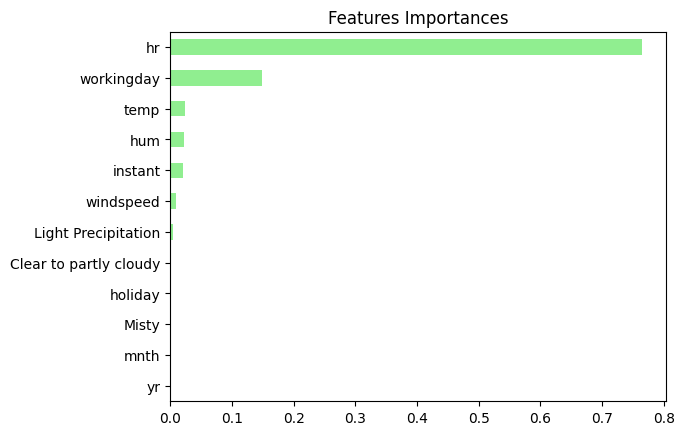

In [15]:
importances = pd.Series(data=rf.feature_importances_, index=df.drop('cnt', axis=1).columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

### Gradient boosting

In [18]:
gbt = GradientBoostingRegressor(max_depth=4, n_estimators=200)
gbt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=200)

In [19]:
y_pred_grad = gbt.predict(X_test)
rmse_test_grad = MSE(y_test, y_pred_grad)**(1/2)
rmse_test_grad

43.35934746009266

### Stochastic gradient boosting

In [21]:
sgbt = GradientBoostingRegressor(max_depth=4, n_estimators=200, subsample=0.9, max_features=0.75)
sgbt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, max_features=0.75, n_estimators=200,
                          subsample=0.9)

In [22]:
y_pred_sgbt = sgbt.predict(X_test)
rmse_test_sgbt = MSE(y_test, y_pred_sgbt)**(1/2)
rmse_test_sgbt

41.64482962216893

In [24]:
sgbt.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 4,
 'max_features': 0.75,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.9,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter tuning

In [26]:
r_forest = RandomForestRegressor()

params_rf = {
              'n_estimators': [100, 350, 500],
              'max_features': ['log2', 'auto', 'sqrt'],
              'min_samples_leaf': [2, 10, 30]
}

grid_rf = GridSearchCV(estimator=r_forest, param_grid=params_rf, scoring='neg_mean_squared_error',
                       cv=3, verbose=1, n_jobs=-1)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\USER\Documents\projects\data\internship\task\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [28]:
best_model = grid_rf.best_estimator_
y_pred_rf = best_model.predict(X_test)
rmse_test_rf = MSE(y_test, y_pred_rf)**(1/2)
rmse_test_rf

51.49979468505558

### Untuned random forest model

In [30]:
r_forest.fit(X_train, y_train)
y_pred_untuned_rf = r_forest.predict(X_test)
rmse_test_untuned_rf = MSE(y_test, y_pred_untuned_rf)**(1/2)
rmse_test_untuned_rf

50.26298562720955